In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install tensorflow
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# MNIST
* MNIST dataset: MNIST is a dataset containing handwritten digits with dimensions of 28x28. Each sample contains a 28x28 image and a label corresponding to the image (a number from 0 to 9).

* The datasets.mnist.load_data() function automatically takes this dataset from TensorFlow and splits it into two groups: training data (train_images, train_labels) and test data (test_images, test_labels).

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 1. Making Data Suitable for CNN
* reshape: Data for CNN models should usually be four-dimensional: (num_samples, height, width, channels).

* num_samples: Number of images (60000 training, 10000 test)

* height and width: Image dimensions (28x28 pixels)

* channels: Color channels in the image. Since MNIST images are black and white, there is only 1 channel (grayscale).

So, in this line we transform the data from (60000, 28, 28) to (60000, 28, 28, 1). The same process is done for the test data.

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))  # (60000, 28, 28, 1)
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))  # (10000, 28, 28, 1)

## 2. Normalize Data
* The pixel values ​​of the images range from 0 to 255 (for black and white). However, working with these values ​​can make the model's learning process difficult. Instead, we normalize and reduce these values ​​to between 0 and 1. In other words, the value of each pixel is divided by 255.

* This helps the model learn faster and more efficiently

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Visualisation

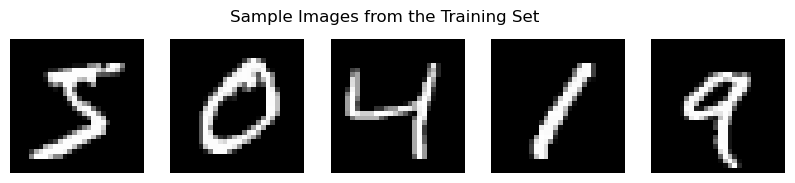

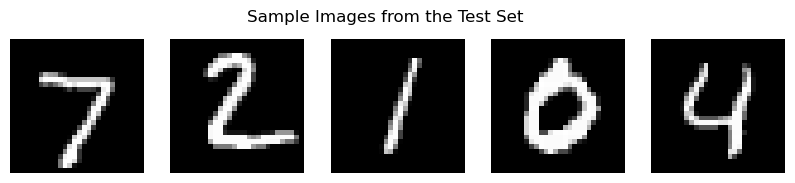

In [6]:
# Visualization: Random sample images from the training set
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  
for i in range(5):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.suptitle('Sample Images from the Training Set')  # Title for the plot
plt.show()

# Visualization: Random sample images from the test set
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  
for i in range(5):
    axes[i].imshow(test_images[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.suptitle('Sample Images from the Test Set')  # Title for the plot
plt.show()

# BUILD MODEL

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import HeUniform

# Define the model
model = Sequential([

    # First convolutional layer
    Conv2D(32, (3,3), activation="relu", kernel_initializer=HeUniform(), input_shape=(28,28,1)),
    # Perform convolution with 32 filters of size 3x3, using 'relu' activation function and HeUniform initializer
    # input_shape=(28,28,1) specifies the input size (28x28 pixels, 1 channel)

    MaxPooling2D(2,2),  # Apply 2x2 max pooling, reduces the size of the feature map

    # Second convolutional layer
    Conv2D(64, (3,3), activation="relu", kernel_initializer=HeUniform()),
    # Perform convolution with 64 filters of size 3x3, using 'relu' activation function and HeUniform initializer

    MaxPooling2D(2,2),  # Apply 2x2 max pooling, reduces the size of the feature map

    # Third convolutional layer
    Conv2D(64, (3,3), activation="relu", kernel_initializer=HeUniform()),
    # Perform convolution with 64 filters of size 3x3, using 'relu' activation function and HeUniform initializer

    Flatten(),  # Flatten the 2D output into a 1D vector after convolution and pooling layers

    # First fully connected (Dense) layer
    Dense(64, activation="relu", kernel_initializer=HeUniform()),
    # Fully connected layer with 64 neurons, 'relu' activation function is used

    # Output fully connected (Dense) layer
    Dense(10, activation="softmax")
    # Output layer, 10 neurons, and softmax activation function. This returns probabilities for 10 classes (digits 0-9)

])

c:\Users\vanng\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [10]:
fit = model.fit(train_images,train_labels , epochs=10 , batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8859 - loss: 0.3789 - val_accuracy: 0.9812 - val_loss: 0.0605
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9840 - loss: 0.0517 - val_accuracy: 0.9801 - val_loss: 0.0599
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9895 - val_loss: 0.0345
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9901 - val_loss: 0.0317
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9889 - val_loss: 0.0360
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9897 - val_loss: 0.0321
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9908 - val_loss: 0.0285
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9966 - loss: 0.0114 - v

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0506


In [12]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 0.0361926294863224
Test Accuracy: 0.9907000064849854


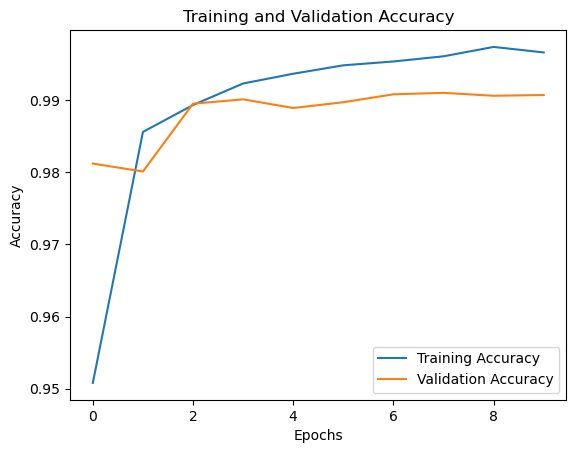

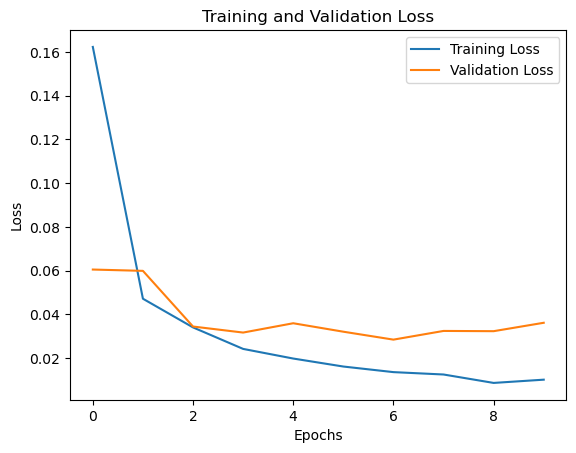

In [13]:
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


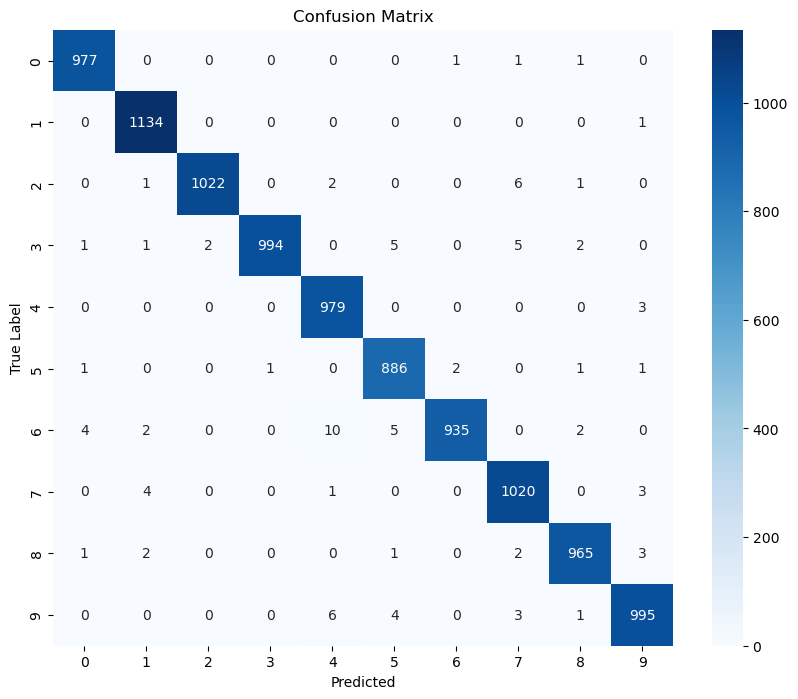

In [14]:
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

# Calculating confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Visualizing confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
model.save("../saved_model/cnn_model.keras")